# $t\bar{t}$-analysis
The chapter is covering the $t\bar{t}$-analysis logic. [2015 CMS Open Data](https://cms.cern/news/first-cms-open-data-lhc-run-2-released) is assumed as input data for concreteness. The basic idea is to give a basic algorithm for distinguishing t-quark pair production channel among other concurrent channels (production of single t-quark and w-jet) and to represent the mass of t-quark using a histogram.

## Input
Input data is a set of five samples of root-files. Each sample is produced in MC simulation and represents partial interaction channel, one of five: $t\bar{t}$-channel, single top s-channel, single top t-channel, single top tW-channel, Wjets-channel.

## Output
The analysis task is a selection events from whole set, in which measured quantities were originated from $t\bar{t}$-decay. In real data one can not exatly know in which event $t\bar{t}$-pair were produced. But since we have simuleted data, we know exactly whether or not $t\bar{t}$ in any particular event. That is defined by set to which file belongs, as was mentioned above. As five channels were involved, five different sets were generated and are given as input data ('ttbar', 'single_top_s_chan', 'single_top_t_chan', 'single_top_tW', 'wjets').
To select events we will apply some criteria (will explained below) and then compare relative abudance of those events which were actually generated with $t\bar{t}$ pair production. The example below demonstrate successfully performed $t\bar{t}$ analysis. That is concludet from the fact, that most of events indeed belong to $t\bar{t}$-channel.



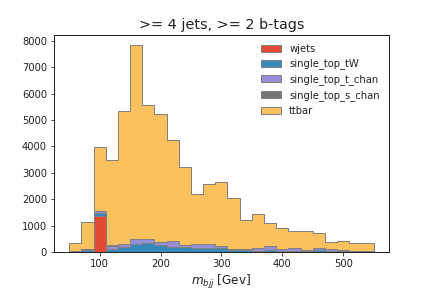

## Filtering alrorithm
Not all particles with it's quantities are necessary for analysis. The only ones that is needed to applying some criterias are leptons (electrons and muons) and jets that is the product of $t\bar{t}$ decay. Semi-leptonic 
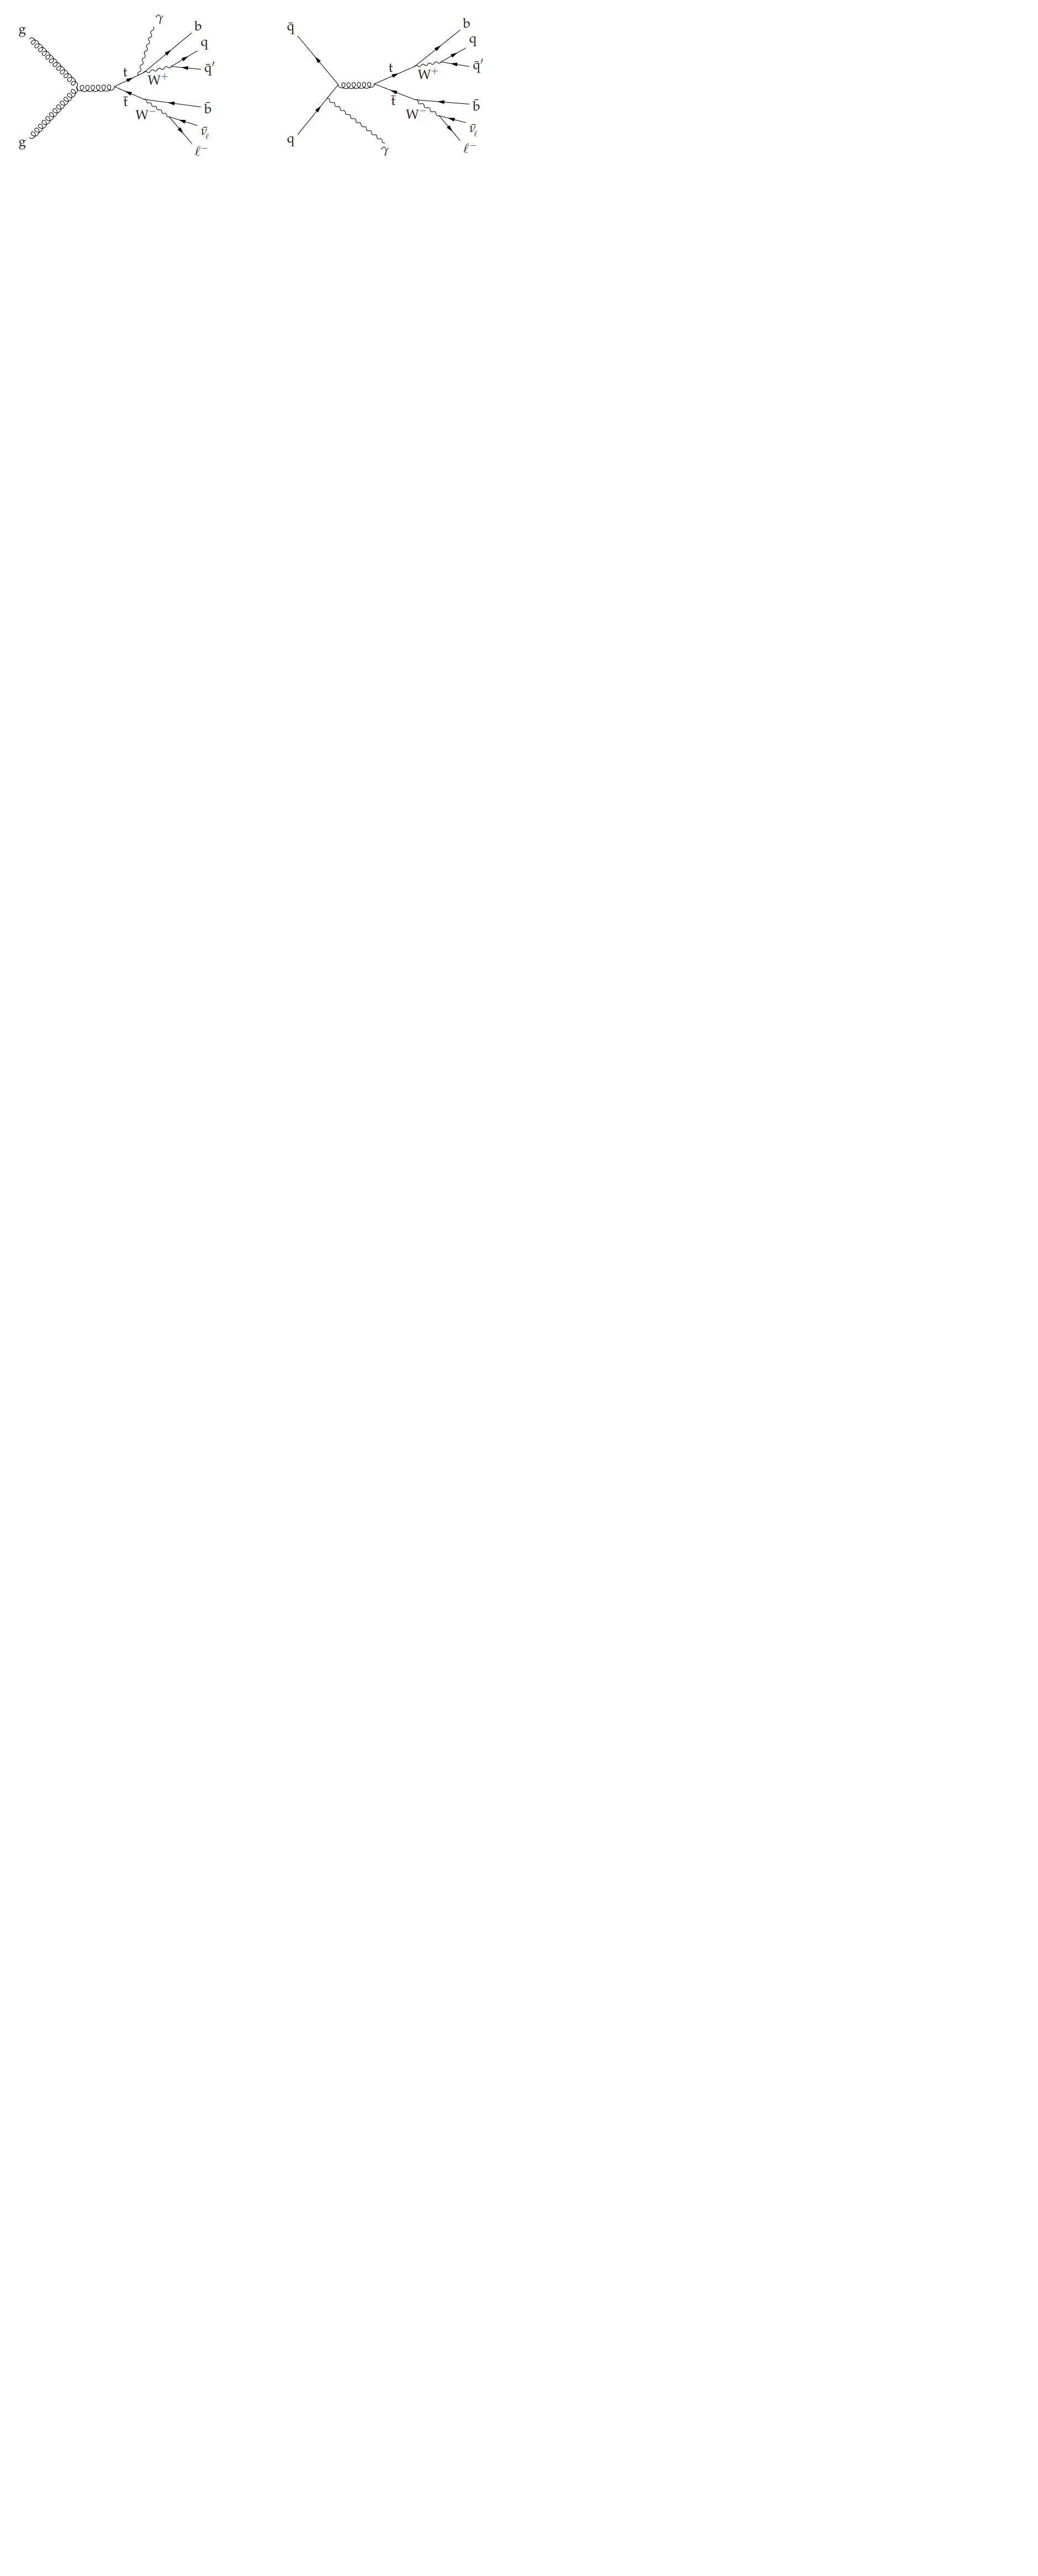
### 1. Filtering events by transverse momentum value
Only electrons, muons and jets are the keep nessecary quantities for analysis. 
